# **Morphological Operations**

5 temel morfolojik operasyon vardır. Bunlar;

*    Erozyon
    
*    Genişleme
    
*    Açma
    
*    Kapatma
    
*    Morfolojik Gradyan'dır.

Erozyondaki amaç ön planda bulunan nesnenin sınırlarını aşındırmaktır.

Sınırları küçültebilmek için öncelikle bir kutu filtresi belirlenmelidir.

Bu filtre görüntü üzerinde dolaşarak sınırları küçültür.

Genişleme işlemi erozyonun tersidir, görüntüde bulunan beyaz yerler kalınlaştırılır.

Açılma işlemi, erozyon ve genişleme işleminin birleşimidir.

Açılma işleminin yapılma sebebi, eğer görüntüde noise bulunuyorsa giderilmesinde fayda sağlar.

Erozyon işlemi ile görüntüdeki beyaz noise giderilir, genişleme işlemi ile de görüntü görülmek istenen boyuta getirilir.

Kapanma işlemi açılmanın tersidir, ilk önce genişleme, sonra erozyon işlemi uygulanır.

Görüntüde ön planda bulunan nesnede siyah noise varsa bu yöntem tercih edilir.

Morfolojik gradyan yönteminde bir görüntüyü önce genişletip sonra erozyona uğratılıp bu ikisi arasındaki fark alındığında, görüntüde ortada siyah boşluk oluşur.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read image
img = cv2.imread(r"C:\Users\ilhan\Desktop\quote.png")

In [ ]:
#convert image bgr to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

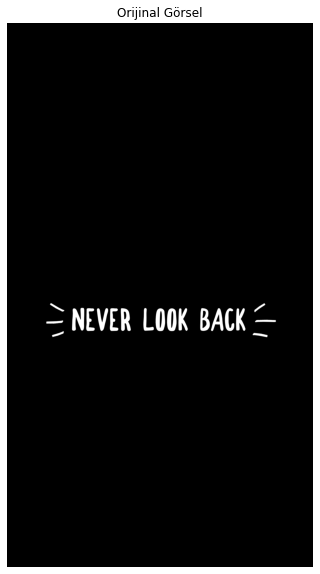

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.title("Orijinal Görsel")
plt.show()

In [ ]:
#erosion

kernel = np.ones((5,5), dtype =np.uint8)
#görselde bulunan yazı beyaz renkte olduğu için birlerden oluşan bir filtre oluşturulur.
#belirlenen filtre 5x5 boyutundadır.

result = cv2.erode(img, kernel, iterations = 1)
#iterations parametresi ile kaç defa erozyon yapılacağı belirlenir.

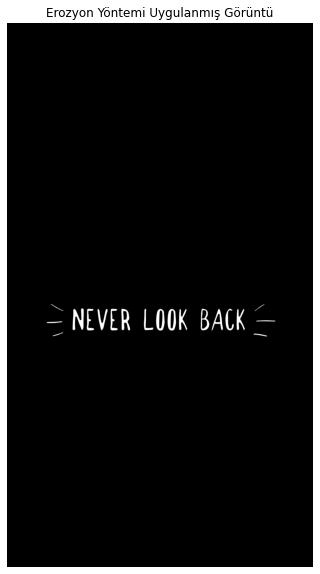

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(result, cmap = "gray")
plt.axis("off")
plt.title("Erozyon Yöntemi Uygulanmış Görüntü")
plt.show()

Erozyon yöntemi uygulandığında görüntüde bulunan yazının inceldiği görülmektedir.

Iteration sayısı 3 olduğunda yazı tamamen yok olmaktadır.

In [ ]:
#dilation
result2 = cv2.dilate(img, kernel, iterations = 1)

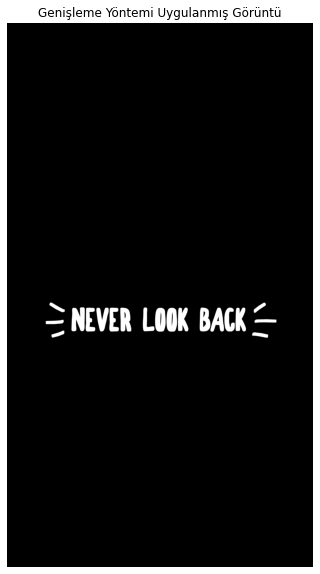

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(result2, cmap = "gray")
plt.axis("off")
plt.title("Genişleme Yöntemi Uygulanmış Görüntü")
plt.show()

Genişleme yöntemi ile yazının genişlediği görülür.

Burada 1'lerden oluşan 5x5 boyutundaki filtre görüntü üzerinde dolaşarak beyaz olan yerlere genişleme işlemi uygular.

Açılma yöntemi görüntüde bulunan beyaz noise'un giderilmesi için kullanılır.

Bu yüzden öncelikle görüntüye noise eklenecektir.

In [ ]:
#white noise

white_noise = np.random.randint(0,2, size = img.shape[:2])
#görüntüde satır, sütun ve channel olmak üzere 3 boyut vardır.
#sadece satır ve sütun kullanılacaktır.

white_noise = white_noise * 255
#0-1 arasında oluşturulan random sayılar 255 ile çarpılarak görüntüye uygun hale getirilir.

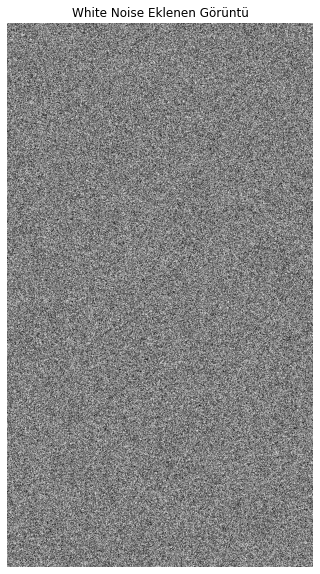

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(white_noise, cmap = "gray")
plt.axis("off")
plt.title("White Noise Eklenen Görüntü")
plt.show()

0-1'lerden oluşan noisy image gösterilmiştir.

In [ ]:
noise_img = white_noise + img

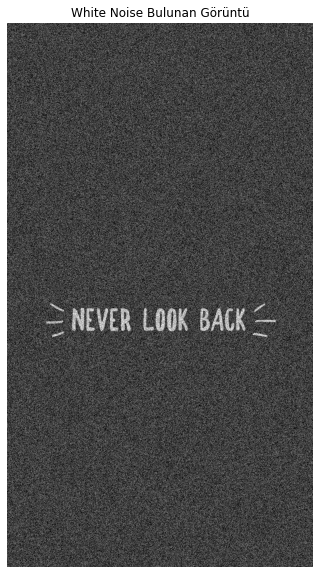

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(noise_img, cmap = "gray")
plt.axis("off")
plt.title("White Noise Bulunan Görüntü")
plt.show()

Elde edilen white noise görüntüye eklenmiştir.

Açılma yöntemiyle bu durum giderilmeye çalışılacatır.

In [ ]:
#opening
opening = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)

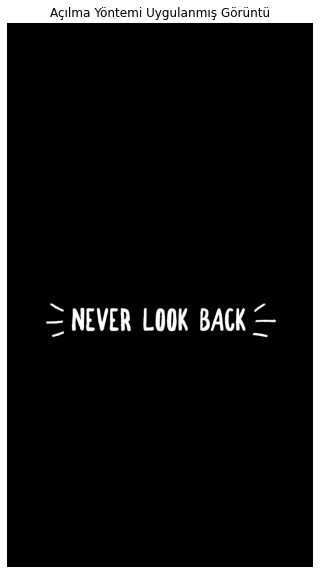

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(opening, cmap = "gray")
plt.axis("off")
plt.title("Açılma Yöntemi Uygulanmış Görüntü")
plt.show()

Uygulanan açılma işleminde erozyon yöntemi ile noise giderildiğinde görüntüde bulunan yazı küçülür, genişleme uygulanarak orijinal görsel elde edilir.

In [ ]:
#black noise
black_noise = np.random.randint(0,2, size = img.shape[:2])
black_noise = black_noise * - 255
#0-1 arasında oluşturulan random değerler -255 ile çarpıldığında black noise elde edilir.

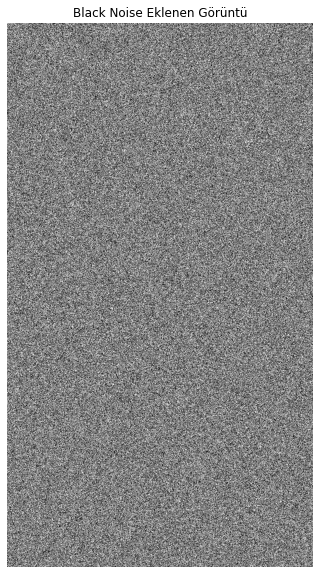

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(black_noise, cmap = "gray")
plt.axis("off")
plt.title("Black Noise Eklenen Görüntü")
plt.show()

In [ ]:
black_noise_img = black_noise + img
black_noise_img[black_noise_img <= -245] = 0

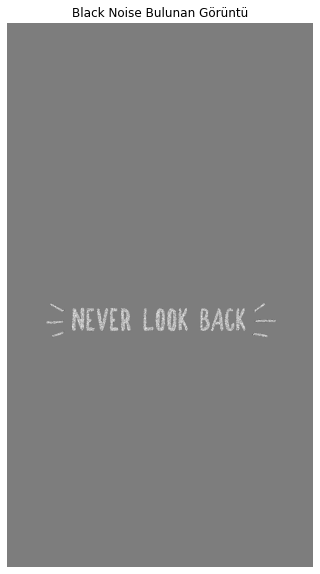

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(black_noise_img, cmap = "gray")
plt.axis("off")
plt.title("Black Noise Bulunan Görüntü")
plt.show()

Siyahın karşılığı 0'dır. 

Görüntünün her tarafına 0 eklenmiştir.

Kapatma yöntemi ile black noise giderilecektir.

In [ ]:
#closing
closing = cv2.morphologyEx(black_noise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)

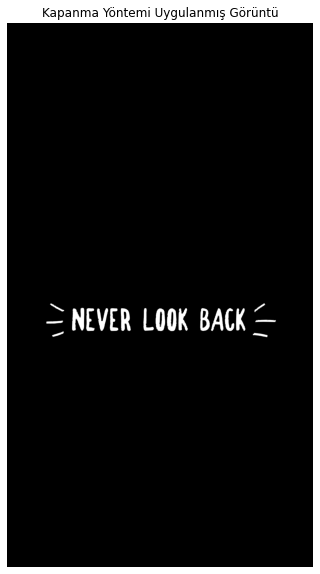

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(closing, cmap = "gray")
plt.axis("off")
plt.title("Kapanma Yöntemi Uygulanmış Görüntü")
plt.show()

Kapanma yöntemiyle görüntüde bulunan black noise giderilmiştir.

Kapanma yönteminde öncelikle genişleme uygulanarak yazılar genişletilir, daha sonrasında erozyon uygulanarak noise giderilir.

In [ ]:
#morphological gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

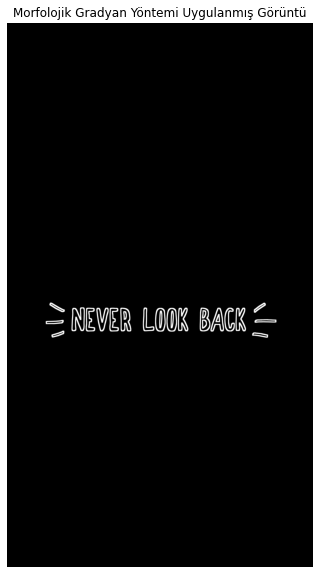

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(gradient, cmap = "gray")
plt.axis("off")
plt.title("Morfolojik Gradyan Yöntemi Uygulanmış Görüntü")
plt.show()

Morfolojik Gradyan yöntemi ile ortaya çıkan görüntüde yazının kenarları belli, ortası boştur.

Böylelikle **edge detection** yapılmış olur.